In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
teldata = pd.read_csv("./veriler/önişleme_data.csv")

In [5]:
from sklearn.preprocessing import LabelEncoder #label encoder kullanıyoruz
labelEncoder = LabelEncoder()
teldata["İşletim Sistemi"] = labelEncoder.fit_transform(teldata["İşletim Sistemi"])
print(teldata["İşletim Sistemi"].value_counts())
print("0     Android")
print("1     Ios")
teldata.describe()

İşletim Sistemi
0    392
1     64
Name: count, dtype: int64
0     Android
1     Ios


,Dahili Hafıza,Ekran Boyutu,RAM Kapasitesi,İşletim Sistemi,price
count,456.000000,456.0,456.000000,456.000000,456.000000
mean,170.541667,7.0,7.089912,0.140351,175.228070
std,109.069040,0.0,2.640061,0.347732,97.549607
min,1.000000,7.0,1.000000,0.000000,0.000000
25%,128.000000,7.0,6.000000,0.000000,91.750000
50%,128.000000,7.0,8.000000,0.000000,180.500000
75%,256.000000,7.0,8.000000,0.000000,267.250000
max,512.000000,7.0,32.000000,1.000000,324.000000


In [6]:
#gerekli kütüphaneler
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
#train test bölümlemelerini oluşturma
from sklearn.model_selection import train_test_split
X = teldata.drop(['price'], axis=1)
y = teldata['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (364, 4)
x_test : (92, 4)
y_train : (364,)
y_test : (92,)


In [8]:
#modelleri denemek için çağıralım (linearRegression,lasso)
from sklearn.linear_model import LinearRegression, Lasso

In [9]:
#lineer regresyon train
lr = LinearRegression()
lr.fit(x_train,y_train)
#
y_predict = lr.predict(x_test) #üreitlen modeli (lr) test verisi ile deneyelim
y_predict #tahmin ettiği değerleri görelim

array([162.87223473,  88.01528651, 112.96760258, 162.87223473,
       245.48601433, 162.87223473, 179.15186442, 162.87223473,
       162.87223473, 121.10741743, 162.87223473, 162.87223473,
       112.96760258, 245.48601433, 179.15186442, 162.87223473,
       179.15186442, 162.87223473, 121.10741743, 162.87223473,
       162.87223473, 179.15186442, 141.98982608, 188.48460694,
       311.67027616,  98.45649084, 274.50823782, 141.98982608,
       211.7111238 , 179.15186442, 112.96760258, 162.87223473,
       112.96760258, 253.4759411 , 162.87223473, 102.52639826,
       179.15186442, 323.3471269 , 121.10741743, 121.10741743,
       162.87223473, 162.87223473, 162.87223473, 220.91668172,
       162.87223473, 162.87223473, 179.15186442, 154.73241988,
       220.91668172, 112.96760258, 162.87223473, 162.87223473,
       290.78786751, 220.91668172, 141.98982608, 162.87223473,
       141.98982608, 253.4759411 , 162.87223473, 162.87223473,
       162.87223473, 220.91668172, 141.98982608, 121.10

In [10]:
#metrikleri görelim
print('mean absolute error : ',mean_absolute_error(y_test, y_predict))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('coefficient of determination R^2 : ',r2_score(y_test,y_predict))

mean absolute error :  65.08733851885036
root mean squared error :  82.52318127351101
coefficient of determination R^2 :  0.3689439420649102


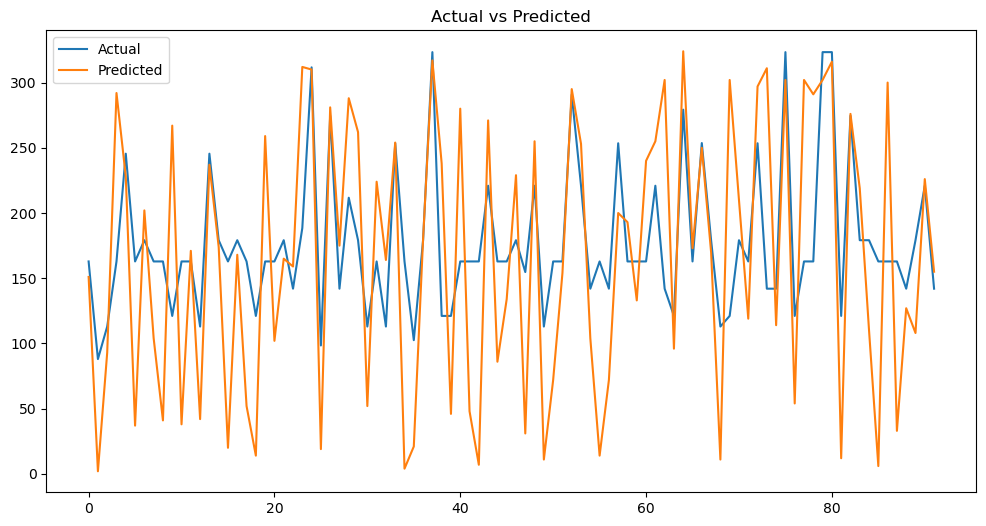

In [11]:
#tahmin edilen değerler ile gerçek değerleri yanyana grafikte görelim
fig = plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  62.49373240645228
root mean squared error :  84.40871415095874
Coefficient of determination R^2:  0.33977709725678806


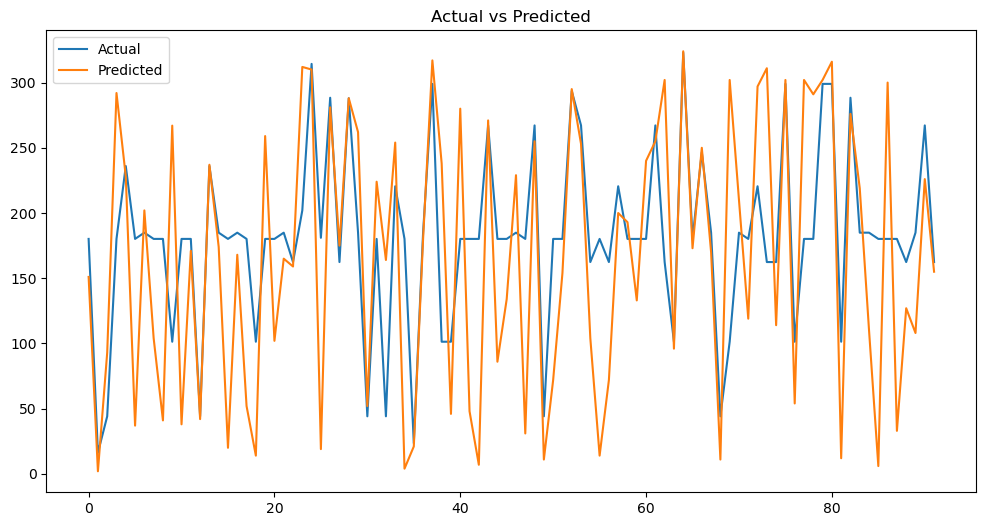

In [12]:
from sklearn.tree import DecisionTreeRegressor
import joblib
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,y_predict_dt))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict_dt)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_dt))

fig=plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  62.424777809176604
root mean squared error :  83.73266980293533
Coefficient of determination R^2:  0.350310430417614


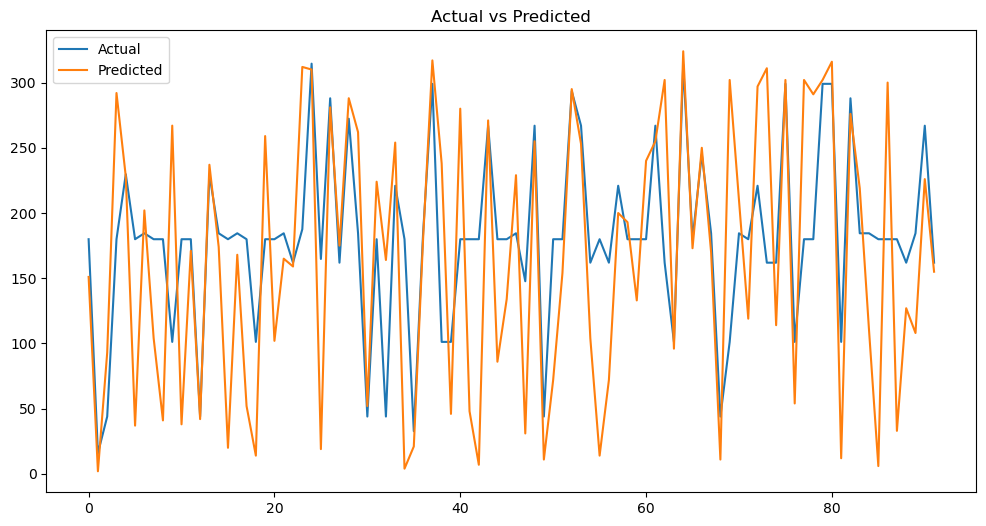

['random_forest_model.pkl']

In [21]:
from sklearn.ensemble import RandomForestRegressor
import joblib
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,y_predict_rf))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig=plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

joblib.dump(rf, 'random_forest_model.pkl')

mean absolute error:  65.08733851885036
root mean squared error :  82.52318127351101
Coefficient of determination R^2:  0.3689439420649102


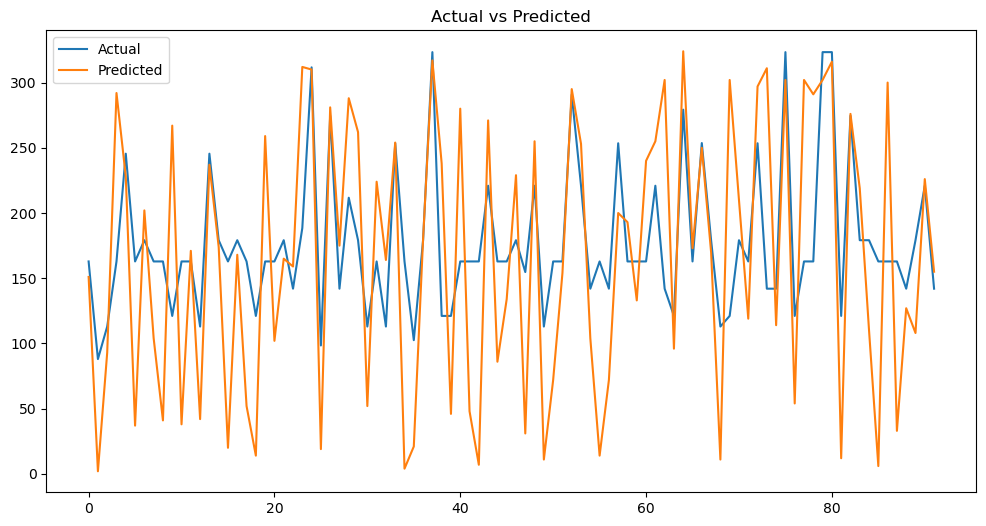

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict_lr = lr.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,y_predict_lr))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lr))

fig=plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lr,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  86.80320698778617
root mean squared error :  99.75526669277946
Coefficient of determination R^2:  0.07787948352992291


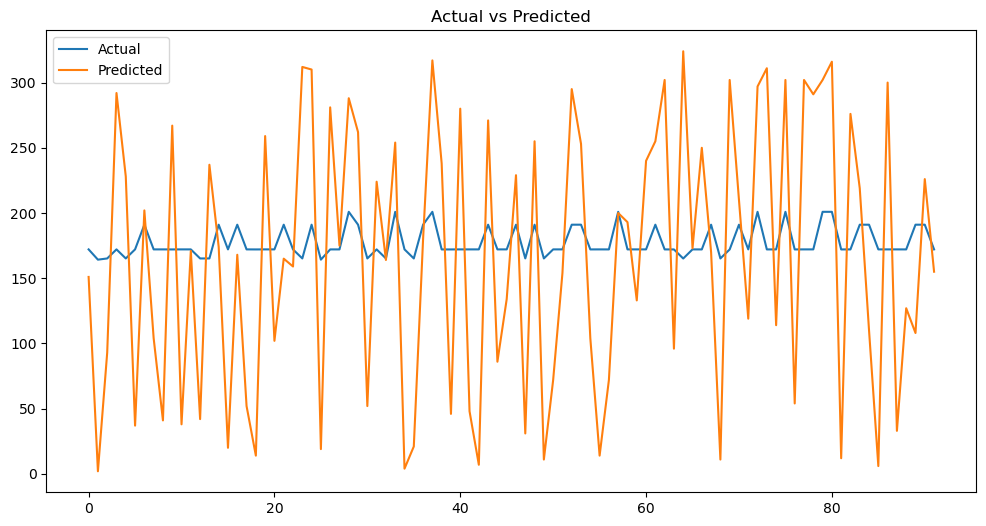

In [15]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(x_train,y_train)
y_predict_sv = sv.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,y_predict_sv))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict_sv)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_sv))

fig=plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_sv,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  65.10697238118787
root mean squared error :  82.55837753939316
Coefficient of determination R^2:  0.3684055344821475


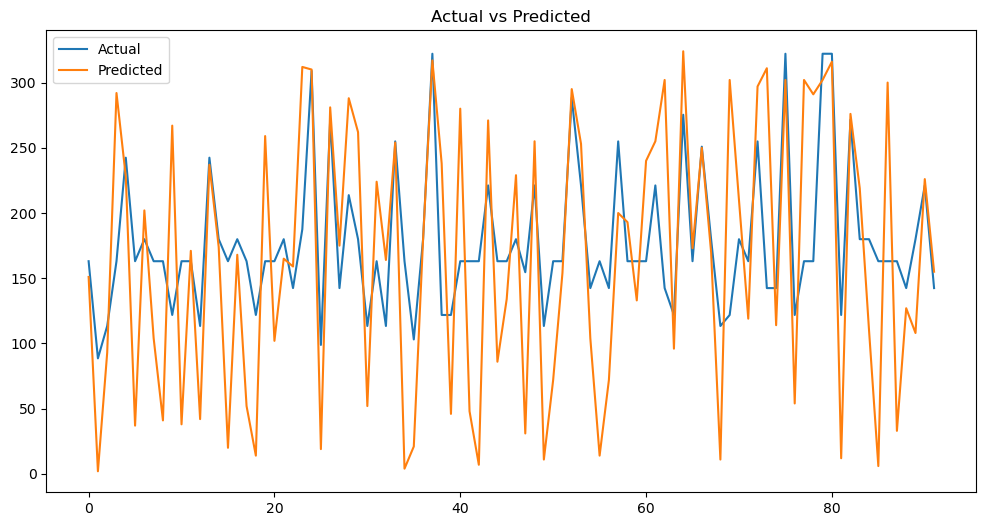

In [16]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(x_train,y_train)
y_predict_rd = rd.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,y_predict_rd))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict_rd)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rd))

fig=plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rd,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  75.59774947795044
root mean squared error :  90.24552607341136
Coefficient of determination R^2:  0.245312114416105


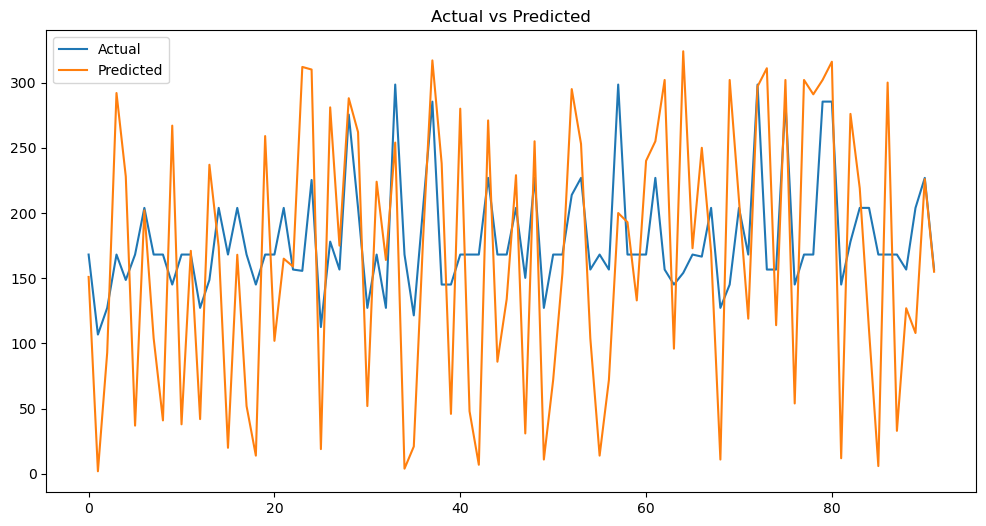

In [17]:
from sklearn.linear_model  import ElasticNet
en = ElasticNet()
en.fit(x_train,y_train)
y_predict_en = en.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,y_predict_en))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict_en)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_en))

fig=plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_en,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  65.44210384218421
root mean squared error :  82.68992011187102
Coefficient of determination R^2:  0.3663912567959179


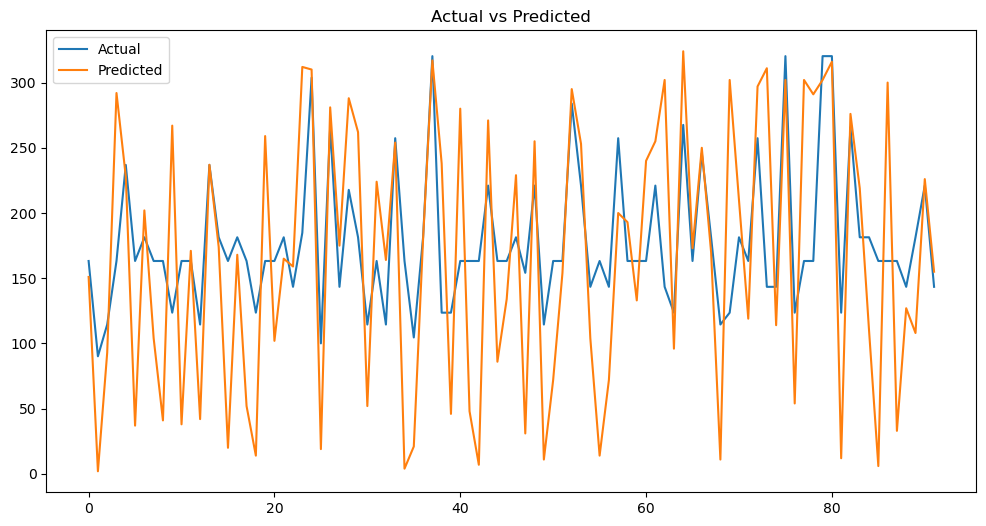

In [18]:
from sklearn.linear_model  import Lasso
ls = Lasso()
ls.fit(x_train,y_train)
y_predict_ls = ls.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,y_predict_ls))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_predict_ls)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_ls))

fig=plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_ls,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [19]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.
